In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
from jedi import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler


from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# New Section

In [ ]:
import sys
sys.path.append('/content/drive/My Drive')
#import mltools as ml

In [ ]:
df=pd.read_csv('/content/drive/My Drive/diabetic_data.csv')
df=df.replace('?',np.NaN)

# Basic Knowlege of Data Set

1.   List item
2.   List item


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.nunique(axis=0)

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Preprocessing

In [ ]:
df1=df.copy()

## Duplicate Record

Some instances have repeated patients, we've shown above that most of the instances are single occurance, so we would take a look at how much of them are repeated.

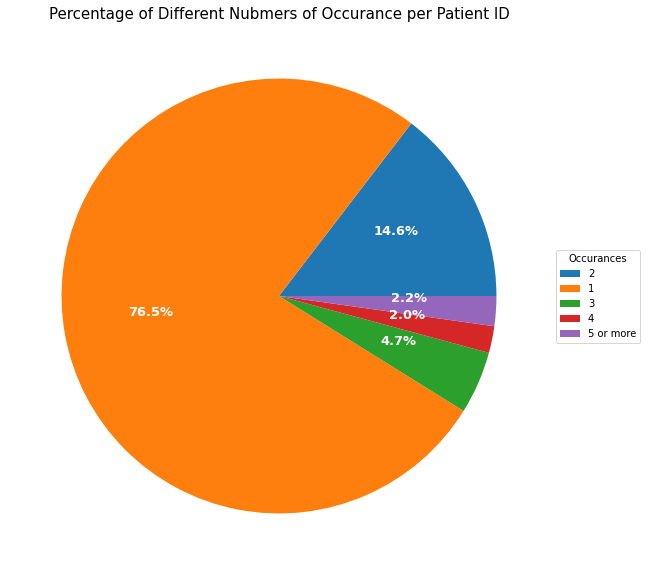

In [ ]:
from collections import Counter
d = Counter(df1.pivot_table(index= ['patient_nbr'], aggfunc ='size'))
d
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = np.array(list(d.values()))
label = np.array(list(d.keys()))
ind = [i for i, j in enumerate(label) if j >= 5]
ind2 = [i for i, j in enumerate(label) if j <5]
data = list(data[ind2]) + [sum(data[ind])]
label = list(label[ind2]) + ['5 or more']
data = [int(float(i)) for i in data]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))


ax.legend(wedges, label,
          title="Occurances",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=13, weight="bold")
ax.set_title("Percentage of Different Nubmers of Occurance per Patient ID", size=15)
plt.show()

In [ ]:
df1[df1.duplicated('patient_nbr',keep=False)].sort_values(by=['patient_nbr'])

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4780,26264286,135,Caucasian,Female,[50-60),NaN,1,1,7,3,NaN,Surgery-Cardiovascular/Thoracic,31,1,14,0,0,1,998,41,250,5,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
4267,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,NaN,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
1164,8380170,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,43,2,13,0,0,1,282,250.01,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,NaN,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,8,NaN,NaN,30,1,16,0,0,1,282,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95640,364338650,188634893,Caucasian,Male,[70-80),NaN,3,1,1,4,MC,InternalMedicine,52,0,11,0,0,0,338,584,250.6,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
101595,441488168,188970179,Asian,Female,[70-80),NaN,1,3,7,6,MC,NaN,44,0,19,0,0,2,415,V42,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
93050,330256946,188970179,Asian,Female,[70-80),NaN,1,6,7,4,MC,NaN,59,1,25,0,0,1,274,584,V42,9,None,Norm,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
98191,397823084,189257846,Asian,Male,[60-70),NaN,1,1,7,2,HM,NaN,13,0,21,0,0,0,493,276,473,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


We conclude that there's no need to remove duplicate rows for same patient. Given that we are unsure how the repeated visits are sampled, we will assume independence among samples. 


## Missing Value

In [ ]:
round(df1.isnull().sum()*100/len(df1),2)

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

### Weight

In [ ]:
# Remove Weight because 96% missing, but include 
df1['has_weight']=df1.weight.notnull().astype('int')
df1['has_weight'].value_counts(dropna=False)
df1.drop(['weight'], axis=1,inplace=True)

### Race

In [ ]:
# we will change NaN into a  new category NanRace
df1['race'].fillna('NaNRace', inplace=True)
print(df1['race'].value_counts(dropna=False))

Caucasian          76099
AfricanAmerican    19210
NaNRace             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


### Payer_Code

In [ ]:
# Remove because 40% missing
df1.drop(['payer_code'], axis=1,inplace=True)

### Diag

In [ ]:
# Remove Rows with Nan (About 1 percent or less)
df1.dropna(axis=0,subset=['diag_1','diag_2','diag_3'],inplace=True)

### Medical_Speciality

In [ ]:
df1.medical_specialty.value_counts(dropna=False).nlargest(20)*100/len(df1)

NaN                                  49.361558
InternalMedicine                     14.348988
Emergency/Trauma                      7.477754
Family/GeneralPractice                7.281234
Cardiology                            5.308048
Surgery-General                       3.015642
Nephrology                            1.597103
Orthopedics                           1.370656
Orthopedics-Reconstructive            1.182116
Radiologist                           1.135230
Pulmonology                           0.859902
Psychiatry                            0.842943
ObstetricsandGynecology               0.652408
Urology                               0.647420
Surgery-Cardiovascular/Thoracic       0.644428
Gastroenterology                      0.558637
Surgery-Vascular                      0.522725
Surgery-Neuro                         0.434939
PhysicalMedicineandRehabilitation     0.390048
Oncology                              0.344160
Name: medical_specialty, dtype: float64

In [ ]:
Most_freq=['InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Missing']
df1['medical_specialty'] = df1['medical_specialty'].replace(np.nan, 'Missing')
for data in df1['medical_specialty']:
  if not data in Most_freq:
    df1['medical_specialty'] = df1['medical_specialty'].replace(data, 'Other')


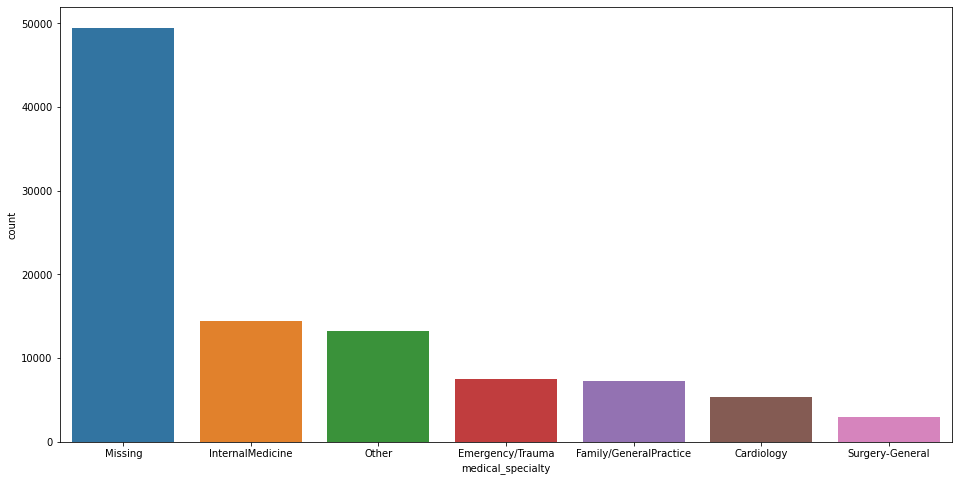

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=df1, x='medical_specialty',order = df1['medical_specialty'].value_counts().index)
plt.show()

In [ ]:
# Remove Rows with Nan (About 1 percent or less)
df1.dropna(axis=0,subset=['diag_1','diag_2','diag_3'],inplace=True)

### Medical_specialty*

This section of hidden code contain medical_specialty >200 occurrances.

In [ ]:
# # 4) medical_specialty 
# df1.medical_specialty.value_counts().plot(kind='bar', figsize = (20,8))
# df1['medical_specialty'].fillna('NaNMed', inplace=True)


In [ ]:
# # we will only choose the features that have more than 200 instances, and group the other ones as others
# TopMed = ['NaNMed','InternalMedicine', 'Family/GeneralPractice','Emergency/Trauma','Cardiology','Surgery-General',\
#           'Orthopedics','Orthopedics-Reconstructive','Radiologist','Nephrology','Pulmonology','Psychiatry','ObstetricsandGynecology','Urology',\
#           'Surgery-Cardiovascular/Thoracic','Surgery-Neuro','Gastroenterology','Surgery-Vascular','Oncology'] 
# df1['medical_specialty2'] = df1['medical_specialty'].copy()
# df1.loc[~df1.medical_specialty2.isin(TopMed),'medical_specialty2'] = 'Other'
# df1.medical_specialty2.value_counts().plot(kind='bar', figsize = (20,8))


### Look Again

In [ ]:
round(df1.isnull().sum()/len(df1) *100,2)

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglita

## Remove Features

In [ ]:
df2=df1.copy()

In [ ]:
df2.nunique(axis=0)

encounter_id                100244
patient_nbr                  70416
race                             6
gender                           3
age                             10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
medical_specialty                7
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                20
diag_1                         715
diag_2                         743
diag_3                         789
number_diagnoses                14
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide           

In [ ]:
# Not Related to our target
df2.drop(['encounter_id','patient_nbr'], axis=1,inplace=True)


### Few Patients use these drugs

In [ ]:
# No one use these drugs
df2.drop(['examide','citoglipton'], axis=1,inplace=True)


In [ ]:
df2['glipizide-metformin'].value_counts(dropna=False)


No        100231
Steady        13
Name: glipizide-metformin, dtype: int64

In [ ]:
df2['glimepiride-pioglitazone'].value_counts(dropna=False)


No        100243
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

In [ ]:
df2['metformin-rosiglitazone'].value_counts(dropna=False)


No        100242
Steady         2
Name: metformin-rosiglitazone, dtype: int64

In [ ]:
df2['metformin-pioglitazone'].value_counts(dropna=False)



No        100243
Steady         1
Name: metformin-pioglitazone, dtype: int64

In [ ]:
df2['acetohexamide'].value_counts(dropna=False)


No        100243
Steady         1
Name: acetohexamide, dtype: int64

In [ ]:
df2['tolbutamide'].value_counts(dropna=False)


No        100221
Steady        23
Name: tolbutamide, dtype: int64

In [ ]:
df2['troglitazone'].value_counts(dropna=False)


No        100241
Steady         3
Name: troglitazone, dtype: int64

In [ ]:
df2['tolazamide'].value_counts(dropna=False)


No        100207
Steady        36
Up             1
Name: tolazamide, dtype: int64

In [ ]:
#Remove all of them
just_few=['glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'
,'acetohexamide','tolbutamide','troglitazone','tolazamide']
df2.drop(just_few, axis=1,inplace=True)

### Over 98% do not use these drugs

In [ ]:
df2['repaglinide'].value_counts(dropna=False)


No        98711
Steady     1380
Up          108
Down         45
Name: repaglinide, dtype: int64

In [ ]:
df2['nateglinide'].value_counts(dropna=False)


No        99546
Steady      663
Up           24
Down         11
Name: nateglinide, dtype: int64

In [ ]:
df2['chlorpropamide'].value_counts(dropna=False)


No        100160
Steady        77
Up             6
Down           1
Name: chlorpropamide, dtype: int64

In [ ]:
df2['acarbose'].value_counts(dropna=False)


No        99939
Steady      292
Up           10
Down          3
Name: acarbose, dtype: int64

In [ ]:
df2['miglitol'].value_counts(dropna=False)


No        100207
Steady        31
Down           4
Up             2
Name: miglitol, dtype: int64

In [ ]:
df2['glyburide-metformin'].value_counts(dropna=False)


No        99549
Steady      681
Up            8
Down          6
Name: glyburide-metformin, dtype: int64

In [ ]:
#Remove all of them
not_much=['repaglinide','nateglinide','chlorpropamide','acarbose','miglitol','glyburide-metformin']
df2.drop(not_much, axis=1,inplace=True)


### Looking Again

In [ ]:
round(df2.isnull().sum()*100/len(df2),2)

race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
glimepiride                 0.0
glipizide                   0.0
glyburide                   0.0
pioglitazone                0.0
rosiglitazone               0.0
insulin                     0.0
change                      0.0
diabetesMed                 0.0
readmitted                  0.0
has_weight                  0.0
dtype: f

##Feature Engineering

In [ ]:
df3=df2.copy()

In [ ]:
df3.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'has_weight'],
      dtype='object')

### Gender

In [ ]:
df3.gender.value_counts(dropna=False)

Female             53922
Male               46319
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
# Remove rows with invalid gender (just 3)
df3 = df3[df3.gender != 'Unknown/Invalid']
df3.gender.value_counts(dropna=False)

Female    53922
Male      46319
Name: gender, dtype: int64

In [ ]:
# Convert gender to 0/1 (Male 1)
df3['gender'] = df3['gender'].replace('Male', 1)
df3['gender'] = df3['gender'].replace('Female', 0)
df3.gender.value_counts()

0    53922
1    46319
Name: gender, dtype: int64

### Age

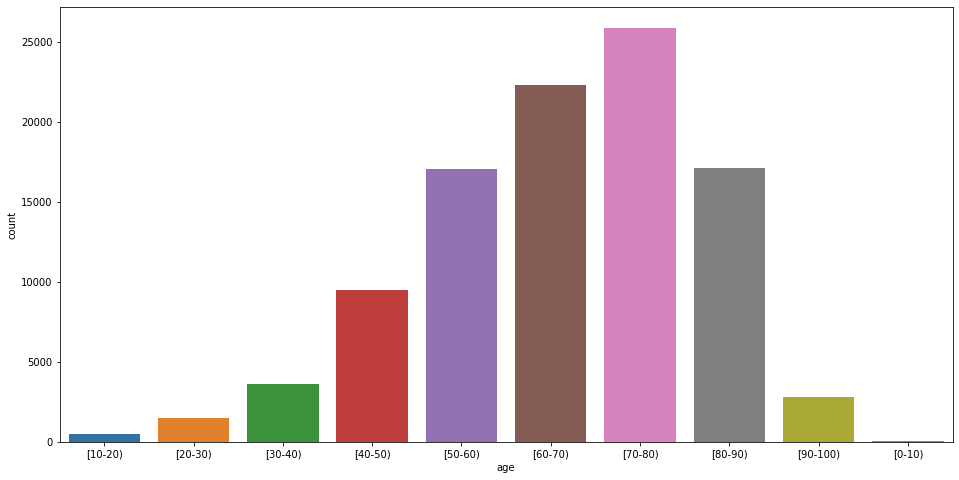

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=df3, x='age')
plt.show()

In [ ]:
# change age into a numerical value
df3['age'].replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[5,15,25,35,45,55,65,75,85,95],inplace=True)


In [ ]:
df3['age'].unique()
df3['age'].value_counts()

75    25896
65    22287
85    17090
55    17044
45     9474
35     3616
95     2785
25     1515
15      469
5        65
Name: age, dtype: int64

### Age*

This section of code combines before 60 as a group.

In [ ]:
# # Try To Balance Age 0-50 =>50 , 50-60=>60 , 60-70=>70, 70-80=>80 , 80-100=>100
# df3['age'].replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[50,50,50,50,50,60,70,80,100,100],inplace=True)
# #plt.figure(figsize=(16,8))
# sns.countplot(data=df3, x='age')
# #plt.show()

### Race

In [ ]:
df3.race.value_counts(dropna=False)

Caucasian          75079
AfricanAmerican    18881
NaNRace             2189
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

In [ ]:
#One-hot Encoding
df3 = pd.concat([df3,pd.get_dummies(df3['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df3[['race_AfricanAmerican','race_Asian','race_Caucasian','race_Hispanic','race_Other','race_NaNRace']].head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_NaNRace
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0


### Glucose serum test result

In [ ]:
df3['max_glu_serum'].value_counts(dropna=False)

None    94978
Norm     2558
>200     1467
>300     1238
Name: max_glu_serum, dtype: int64

In [ ]:
df3['max_glu_serum'].replace(['None','Norm','>200','>300'],[0,1,2,3],inplace=True)
df3['max_glu_serum'].value_counts(dropna=False)

0    94978
1     2558
2     1467
3     1238
Name: max_glu_serum, dtype: int64

### A1c test result

In [ ]:
df3['A1Cresult'].value_counts(dropna=False)

None    83642
>8       7877
Norm     4935
>7       3787
Name: A1Cresult, dtype: int64

In [ ]:
df3['A1Cresult'].replace(['None','Norm','>8','>7'],[0,1,3,2],inplace=True)
df3['A1Cresult'].value_counts(dropna=False)

0    83642
3     7877
1     4935
2     3787
Name: A1Cresult, dtype: int64

### Drugs

7 drugs remain in our features, all of them has same value: None, Up, Down, Steady

In [ ]:
pd.unique(df3[['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']].values.ravel('K'))

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [ ]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for drug in drug_list:
  df3[drug].replace(['No','Down','Steady','Up'],[0,1,2,3],inplace=True)


In [ ]:
pd.unique(df3[['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']].values.ravel('K'))

array([0, 2, 3, 1])

### Change of medications

In [ ]:
df3['change'].value_counts(dropna=False)

No    53891
Ch    46350
Name: change, dtype: int64

In [ ]:
df3['change'].replace(['No','Ch'],[0,1],inplace=True)
df3['change'].value_counts(dropna=False)

0    53891
1    46350
Name: change, dtype: int64

### Diabetes medications

In [ ]:
df3['diabetesMed'].value_counts(dropna=False)

Yes    77153
No     23088
Name: diabetesMed, dtype: int64

In [ ]:
df3['diabetesMed'].replace(['No','Yes'],[0,1],inplace=True)
df3['diabetesMed'].value_counts(dropna=False)

1    77153
0    23088
Name: diabetesMed, dtype: int64

### Diag

1) Circulatory	390–459, 785	
Diseases of the circulatory system

2) Respiratory	460–519, 786
Diseases of the respiratory system

3) Digestive	520–579, 787
Diseases of the digestive system

4) Diabetes	250.xx		
Diabetes mellitus

5) Injury	800–999	4,697	6.7%	
Injury and poisoning

6) Musculoskeletal	710–739		
Diseases of the musculoskeletal system and connective tissue

7) Genitourinary	580–629, 788		
Diseases of the genitourinary system

8) Neoplasms	140–239		Neoplasms
* 780, 781, 784, 790–799	
Other symptoms, signs, and ill-defined conditions
* 240–279, without 250		
Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes
* 680–709, 782		
Diseases of the skin and subcutaneous tissue 
* 001–139		
Infectious and parasitic diseases

9) Other
* 290–319		Mental disorders
* E–V		External causes of injury and supplemental classification
* 280–289		Diseases of the blood and blood-forming organs
* 320–359		Diseases of the nervous system
* 630–679		Complications of pregnancy, childbirth, and the puerperium
* 360–389		Diseases of the sense organs
* 740–759		Congenital anomalies


In [ ]:
circ = list(np.arange(390,460,1)) + [785]
resp = list(np.arange(460,520,1)) + [786]
dige = list(np.arange(520,580,1)) + [787]
diab = list(np.round(np.arange(250,251,0.01),2)) +[250]
# diab = ['%f2'% i for i in diab]
inju = list(np.arange(800,1000,1))
musc = list(np.arange(710,740,1))
genit = list(np.arange(580,629,1)) + [788]
neop = list(np.arange(140,240,1)) + [780,781,784] + \
        list(np.arange(790,800,1)) + list(np.arange(240,250,1)) +\
        list(np.arange(251,280,1)) + list(np.arange(680,710,1)) + [782] +\
        list(np.arange(1,140,1))
other = list(np.arange(290,320,1)) + list(np.arange(280,290,1)) +\
        list(np.arange(320,360,1)) + list(np.arange(630,680,1)) +\
        list(np.arange(360,390,1)) + list(np.arange(740,760,1)) + [789,783] + [365.44]
EV = ['E','V']   # also in other category 

In [ ]:
df4=df3.copy()

In [ ]:
#List of ICD-9 codes E and V codes => others
diag_list=['diag_1','diag_2','diag_3']
EV=['V','E']

for dig in diag_list:
  for l in EV:
    df4.loc[df4[dig].str.contains(l,na=False,case=False), dig] = 'other'



In [ ]:
groups = [circ,resp,dige,inju,musc,genit,neop,other, diab]
for i, g in enumerate(groups):
  for j, k in enumerate(g): 
    groups[i][j] = str(k)


In [ ]:
# groups.append(diab)
len(groups)
groupname = ['circ','resp','dige','inju','musc','genit','neop','other','diab']


for i, g in enumerate(groups):
  for dig in diag_list:
      # df4.loc[df4[dig].str.contains(g,na=False,case=False), dig] = groupname[i] 
      df4.loc[df4[dig].isin(g), dig] = groupname[i] 


In [ ]:
df4.diag_1.value_counts()

circ     30306
resp     14305
neop     13925
dige      9363
diab      8134
other     7442
inju      6834
genit     5074
musc      4858
Name: diag_1, dtype: int64

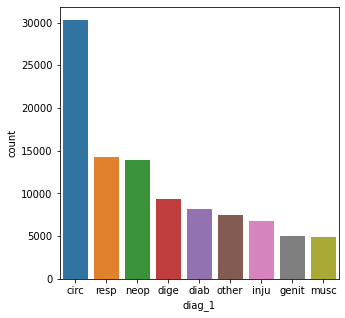

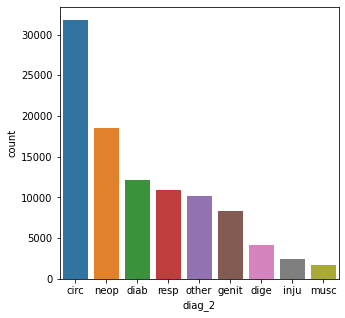

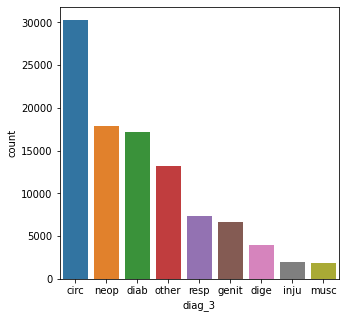

In [ ]:
# fig,ax = plt.subplots(1,3,figsize = (18,6))
for i in diag_list:
  plt.figure(figsize=(5,5))
  sns.countplot(data=df4, x=i,order = df4[i].value_counts().index)
  plt.show()
# plt.title('Primary Diagnosis')

In [ ]:
# One-hot Encoding
df_cat = pd.get_dummies(df4[diag_list], drop_first=False)
df4 = pd.concat([df4, df_cat], axis= 1)
df4.columns

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'has_weight', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_NaNRace', 'race_Other', 'diag_1_circ',
       'diag_1_diab', 'diag_1_dige', 'diag_1_genit', 'diag_1_inju',
       'diag_1_musc', 'diag_1_neop', 'diag_1_other', 'diag_1_resp',
       'diag_2_circ', 'diag_2_diab', 'diag_2_dige', 'diag_2_genit',
       'diag_2_inju', 'diag_2_musc', 'diag_2_neop', 'diag_2_other',
       'diag_2_resp', 'diag_3_circ', 'diag_3_diab', 'diag_3_dige',

In [ ]:
diag_list

['diag_1', 'diag_2', 'diag_3']

In [ ]:
df4[diag_list]

,diag_1,diag_2,diag_3
1,neop,diab,neop
2,other,diab,other
3,neop,diab,circ
4,neop,neop,diab
5,circ,circ,diab
...,...,...,...
101761,diab,other,circ
101762,dige,neop,dige
101763,neop,genit,other
101764,inju,other,inju


In [ ]:
# create another 'ever diagnosed'

groupname = ['circ','resp','dige','inju','musc','genit','neop','other','diab']
groupname2 = [i + '_any' for i in groupname]
for i, j in enumerate(groupname2):
  df4[j] = df4['diag_1'].str.contains(groupname[i])| df4['diag_2'].str.contains(groupname[i]) | df4['diag_3'].str.contains(groupname[i])


In [ ]:
df4.drop(['diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [ ]:
df4[groupname2] = df4[groupname2].astype(int)

### Discharge disposition

Removing all encounters that resulted in either discharge to a hospice or patient death

In [ ]:
df4['discharge_disposition_id'].value_counts(dropna=False)

1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [ ]:
df4 = df4[~df4.discharge_disposition_id.isin([11,13,14,19,20,21])]
df4['discharge_disposition_id'].value_counts(dropna=False)

1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
5      1167
25      956
4       805
7       604
23      406
28      138
8       107
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

Group some of them together:

[6,8]

[9,10,18,25,26,27] (N/A or low frequency)

[3,4,5,22,23,24]

[12,15,16,17]



In [ ]:
df4['discharge_disposition_id'].replace([6,8,9,10,18,25,26,27,3,4,5,22,23,24,12,15,16,17],
                                        ['6-8','6-8','Other','Other','Other','Other','Other','Other','3,4,5,22,23,24','3,4,5,22,23,24',
                                         '3,4,5,22,23,24','3,4,5,22,23,24','3,4,5,22,23,24','3,4,5,22,23,24',
                                         '12,15,16,17','12,15,16,17','12,15,16,17','12,15,16,17'],inplace=True)
df4['discharge_disposition_id'].value_counts(dropna=False)

1                 59003
3,4,5,22,23,24    18304
6-8               12937
Other              4630
2                  2115
7                   604
28                  138
12,15,16,17          91
Name: discharge_disposition_id, dtype: int64

In [ ]:
#One-hot Encoding
df4 = pd.concat([df4,pd.get_dummies(df4['discharge_disposition_id'], prefix='discharge_disposition_id')], axis=1).drop(['discharge_disposition_id'],axis=1)

In [ ]:
df4.head()

,gender,age,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,has_weight,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_NaNRace,race_Other,diag_1_circ,diag_1_diab,diag_1_dige,diag_1_genit,diag_1_inju,diag_1_musc,diag_1_neop,diag_1_other,diag_1_resp,diag_2_circ,diag_2_diab,diag_2_dige,diag_2_genit,diag_2_inju,diag_2_musc,diag_2_neop,diag_2_other,diag_2_resp,diag_3_circ,diag_3_diab,diag_3_dige,diag_3_genit,diag_3_inju,diag_3_musc,diag_3_neop,diag_3_other,diag_3_resp,circ_any,resp_any,dige_any,inju_any,musc_any,genit_any,neop_any,other_any,diab_any,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_7,discharge_disposition_id_28,"discharge_disposition_id_12,15,16,17","discharge_disposition_id_3,4,5,22,23,24",discharge_disposition_id_6-8,discharge_disposition_id_Other
1,0,15,1,7,3,Missing,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,3,1,1,>30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2,0,25,1,7,2,Missing,11,5,13,2,0,1,6,0,0,0,0,2,0,0,0,0,0,1,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
3,1,35,1,7,2,Missing,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,3,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,1,45,1,7,1,Missing,51,0,8,0,0,0,5,0,0,0,0,2,0,0,0,2,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
5,1,55,2,2,3,Missing,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,2,0,1,>30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


### Admission Type ID

In [ ]:
df4['admission_type_id'].value_counts(dropna=False)

1    51613
3    18344
2    17856
6     5115
5     4551
8      315
7       18
4       10
Name: admission_type_id, dtype: int64

[4,5,6,7,8] (N/A and low frequency)

In [ ]:
df4['admission_type_id'].replace([4,5,6,7,8],['Other','Other','Other','Other','Other'],inplace=True)
df4['admission_type_id'].value_counts(dropna=False)

1        51613
3        18344
2        17856
Other    10009
Name: admission_type_id, dtype: int64

In [ ]:
#One-hot Encoding
df4 = pd.concat([df4,pd.get_dummies(df4['admission_type_id'], prefix='admission_type_id')], axis=1).drop(['admission_type_id'],axis=1)

In [ ]:
df4.head()

,gender,age,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,has_weight,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_NaNRace,race_Other,diag_1_circ,diag_1_diab,diag_1_dige,diag_1_genit,diag_1_inju,diag_1_musc,diag_1_neop,diag_1_other,diag_1_resp,diag_2_circ,diag_2_diab,diag_2_dige,diag_2_genit,diag_2_inju,diag_2_musc,diag_2_neop,diag_2_other,diag_2_resp,diag_3_circ,diag_3_diab,diag_3_dige,diag_3_genit,diag_3_inju,diag_3_musc,diag_3_neop,diag_3_other,diag_3_resp,circ_any,resp_any,dige_any,inju_any,musc_any,genit_any,neop_any,other_any,diab_any,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_7,discharge_disposition_id_28,"discharge_disposition_id_12,15,16,17","discharge_disposition_id_3,4,5,22,23,24",discharge_disposition_id_6-8,discharge_disposition_id_Other,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_Other
1,0,15,7,3,Missing,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,3,1,1,>30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,0,25,7,2,Missing,11,5,13,2,0,1,6,0,0,0,0,2,0,0,0,0,0,1,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,1,35,7,2,Missing,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,3,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,1,45,7,1,Missing,51,0,8,0,0,0,5,0,0,0,0,2,0,0,0,2,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5,1,55,2,3,Missing,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,2,0,1,>30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


### Admission Source ID

In [ ]:
df4['admission_source_id'].value_counts(dropna=False)

7     55155
1     28639
17     6472
4      3076
6      2119
2      1069
5       803
3       177
20      159
9       112
8        14
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

[2,3]

[5, 6, 10, 22, 25]

[8,9,11,13,14,15, 17, 20, 21,22] (N/A or Low Frequency)


In [ ]:
df4['admission_source_id'].replace([2,3],['2,3','2,3'],inplace=True)
df4['admission_source_id'].replace([5, 6, 10, 22, 25],['5, 6, 10, 22, 25','5, 6, 10, 22, 25','5, 6, 10, 22, 25','5, 6, 10, 22, 25',
                                                       '5, 6, 10, 22, 25'],inplace=True)
df4['admission_source_id'].replace([8,9,11,13,14,15, 17, 20, 21,22],['Other','Other','Other','Other','Other','Other','Other',
                                                                     'Other','Other','Other',],inplace=True)
df4['admission_source_id'].value_counts(dropna=False)

7                   55155
1                   28639
Other                6762
4                    3076
5, 6, 10, 22, 25     2944
2,3                  1246
Name: admission_source_id, dtype: int64

In [ ]:
#One-hot Encoding
df4 = pd.concat([df4,pd.get_dummies(df4['admission_source_id'], prefix='admission_source_id')], axis=1).drop(['admission_source_id'],axis=1)

In [ ]:
df4.head()

,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,has_weight,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_NaNRace,race_Other,diag_1_circ,diag_1_diab,diag_1_dige,diag_1_genit,diag_1_inju,diag_1_musc,diag_1_neop,diag_1_other,diag_1_resp,diag_2_circ,...,diag_2_musc,diag_2_neop,diag_2_other,diag_2_resp,diag_3_circ,diag_3_diab,diag_3_dige,diag_3_genit,diag_3_inju,diag_3_musc,diag_3_neop,diag_3_other,diag_3_resp,circ_any,resp_any,dige_any,inju_any,musc_any,genit_any,neop_any,other_any,diab_any,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_7,discharge_disposition_id_28,"discharge_disposition_id_12,15,16,17","discharge_disposition_id_3,4,5,22,23,24",discharge_disposition_id_6-8,discharge_disposition_id_Other,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_Other,admission_source_id_1,admission_source_id_4,admission_source_id_7,"admission_source_id_2,3","admission_source_id_5, 6, 10, 22, 25",admission_source_id_Other
1,0,15,3,Missing,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,3,1,1,>30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,25,2,Missing,11,5,13,2,0,1,6,0,0,0,0,2,0,0,0,0,0,1,NO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,35,2,Missing,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,3,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,45,1,Missing,51,0,8,0,0,0,5,0,0,0,0,2,0,0,0,2,1,1,NO,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5,1,55,3,Missing,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,2,0,1,>30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### Target 


We want to predict whether the patient will readmit within 30 days or not. 

In [ ]:
df4['readmitted'].value_counts(dropna=False)

NO     51485
>30    35130
<30    11207
Name: readmitted, dtype: int64

In [ ]:
df4['readmitted'].replace(['NO','>30','<30'],[0,0,1],inplace=True)
df4['readmitted'].value_counts(dropna=False)

0    86615
1    11207
Name: readmitted, dtype: int64

### Medical Speciality

In [ ]:
df4['medical_specialty'].value_counts(dropna=False)

Missing                   48149
InternalMedicine          13987
Other                     12994
Emergency/Trauma           7350
Family/GeneralPractice     7111
Cardiology                 5247
Surgery-General            2984
Name: medical_specialty, dtype: int64

In [ ]:
#One-hot Encoding
df4 = pd.concat([df4,pd.get_dummies(df4['medical_specialty'], prefix='medical_specialty')], axis=1).drop(['medical_specialty'],axis=1)

In [ ]:
df4[['medical_specialty_Missing','medical_specialty_InternalMedicine','medical_specialty_Other'
,'medical_specialty_Emergency/Trauma','medical_specialty_Family/GeneralPractice','medical_specialty_Cardiology',
'medical_specialty_Surgery-General']].tail()

,medical_specialty_Missing,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,medical_specialty_Surgery-General
101761,1,0,0,0,0,0,0
101762,1,0,0,0,0,0,0
101763,1,0,0,0,0,0,0
101764,0,0,0,0,0,0,1
101765,1,0,0,0,0,0,0


## Modeling

In [ ]:
df5=df4.copy()

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97822 entries, 1 to 101765
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   gender                                    97822 non-null  int64
 1   age                                       97822 non-null  int64
 2   time_in_hospital                          97822 non-null  int64
 3   num_lab_procedures                        97822 non-null  int64
 4   num_procedures                            97822 non-null  int64
 5   num_medications                           97822 non-null  int64
 6   number_outpatient                         97822 non-null  int64
 7   number_emergency                          97822 non-null  int64
 8   number_inpatient                          97822 non-null  int64
 9   number_diagnoses                          97822 non-null  int64
 10  max_glu_serum                             97822 non-null 

### Data Split and scaling

In [ ]:

Numeric=['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']

Y = df5['readmitted']
X = df5.drop(['readmitted','has_weight'], axis=1)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
scaling = StandardScaler()

X_train_val_non=X_train_val[Numeric]
X_test_non=X_test[Numeric]

X_train_val_non_s = scaling.fit_transform(X_train_val_non)
X_test_non_s = scaling.transform(X_test_non)


X_train_val_s = pd.DataFrame(X_train_val_non_s)
X_test_s = pd.DataFrame(X_test_non_s)
X_train_val_s.columns = X_train_val_non.columns
X_test_s.columns = X_test_non.columns

X_train_val.reset_index(inplace=True)
X_test.reset_index(inplace=True)

X_train_val[Numeric]=X_train_val_s
X_test[Numeric]=X_test_s

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15, random_state=42)

X_train.drop(['index'], axis=1,inplace=True)
X_val.drop(['index'], axis=1,inplace=True)
X_test.drop(['index'], axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Oversampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


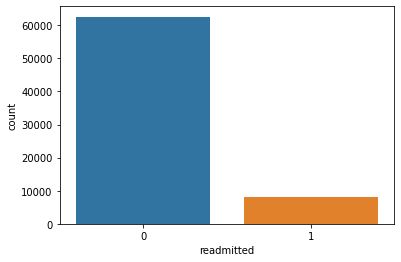

In [ ]:
sns.countplot(Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


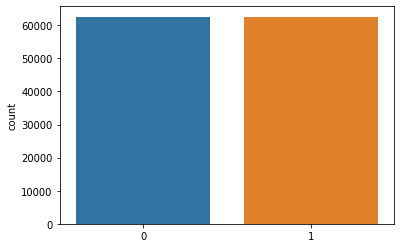

In [ ]:
method = RandomOverSampler(random_state = 21)
X_train, Y_train=method.fit_sample(X_train, Y_train)
X_train=pd.DataFrame(X_train)
X_train.columns=X.columns
sns.countplot(Y_train)

# Model selection

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
prob1_ = nb.predict_proba(X_train)
prob2_ = nb.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_nb, tpr_nb, _ = roc_curve(Y_val, Y_val_predict)

[[52642  9938]
 [44125 18455]]
              precision    recall  f1-score   support

           0       0.54      0.84      0.66     62580
           1       0.65      0.29      0.41     62580

    accuracy                           0.57    125160
   macro avg       0.60      0.57      0.53    125160
weighted avg       0.60      0.57      0.53    125160

[[9351 1731]
 [1003  388]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     11082
           1       0.18      0.28      0.22      1391

    accuracy                           0.78     12473
   macro avg       0.54      0.56      0.55     12473
weighted avg       0.82      0.78      0.80     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

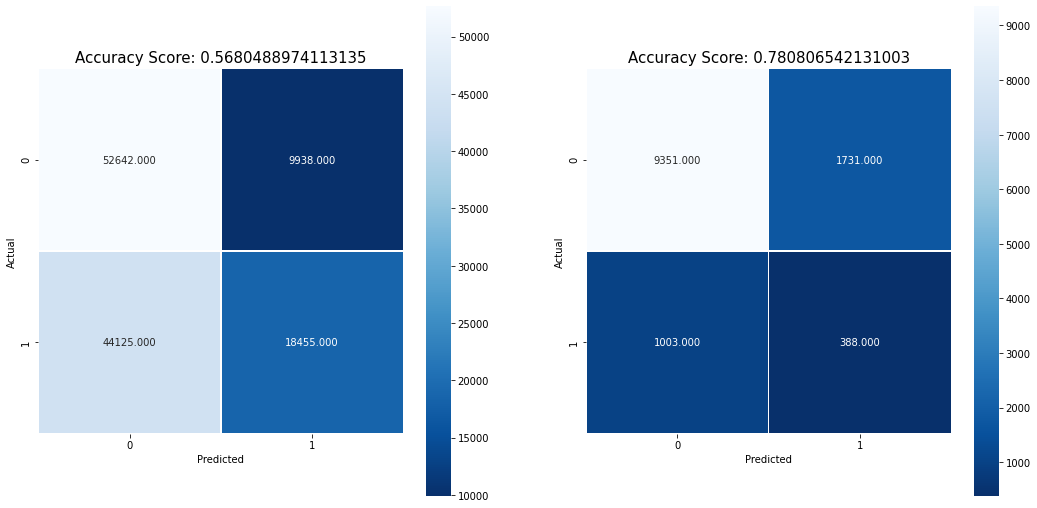

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

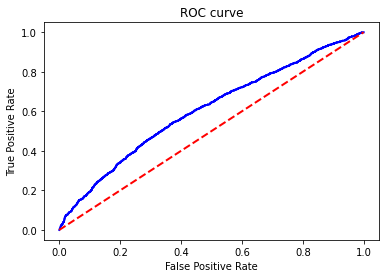

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prob1_ = lr.predict_proba(X_train)
prob2_ = lr.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_lr, tpr_lr, _ = roc_curve(Y_val, Y_val_predict)

[[42109 20471]
 [28250 34330]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63     62580
           1       0.63      0.55      0.58     62580

    accuracy                           0.61    125160
   macro avg       0.61      0.61      0.61    125160
weighted avg       0.61      0.61      0.61    125160

[[7556 3526]
 [ 652  739]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     11082
           1       0.17      0.53      0.26      1391

    accuracy                           0.67     12473
   macro avg       0.55      0.61      0.52     12473
weighted avg       0.84      0.67      0.73     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

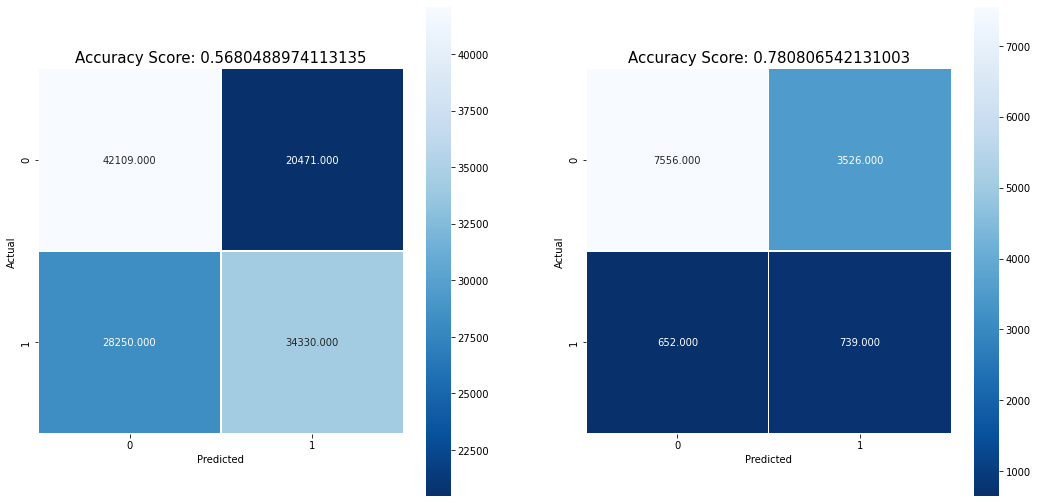

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

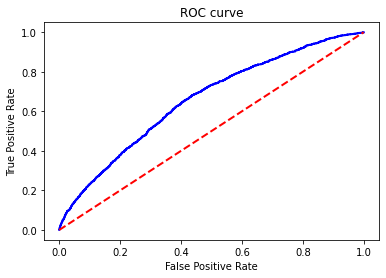

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
lr_train_auc = roc_auc_score(Y_train,Y_train_predict)
lr_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('Logistic regression training auc is: ', lr_train_auc)
print('Logistic regression validation auc is: ', lr_val_auc)

Logistic regression training auc is:  0.6600983840077477
Logistic regression validation auc is:  0.6575276829895332


## Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(loss = 'log',alpha = 0.1,random_state = 0)
sgdclass.fit(X_train, Y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
prob1_ = sgdclass.predict_proba(X_train)
prob2_ = sgdclass.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_sgdc, tpr_sgdc, _ = roc_curve(Y_val, Y_val_predict)

[[42862 19718]
 [29745 32835]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63     62580
           1       0.62      0.52      0.57     62580

    accuracy                           0.60    125160
   macro avg       0.61      0.60      0.60    125160
weighted avg       0.61      0.60      0.60    125160

[[7653 3429]
 [ 675  716]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     11082
           1       0.17      0.51      0.26      1391

    accuracy                           0.67     12473
   macro avg       0.55      0.60      0.52     12473
weighted avg       0.84      0.67      0.73     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

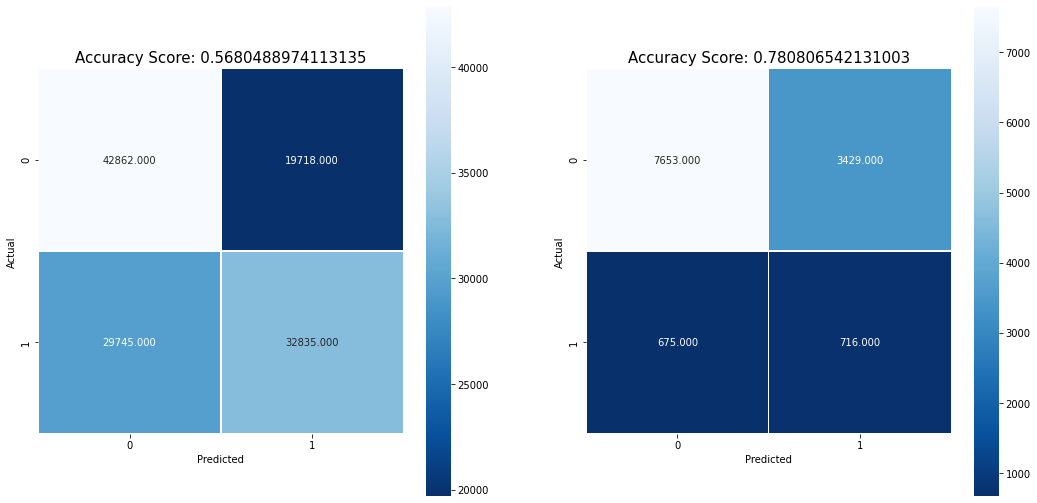

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

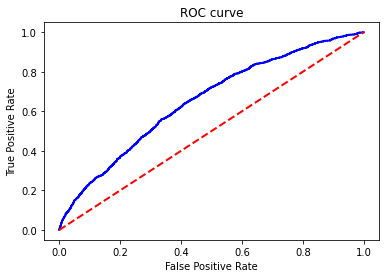

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_sgdc, tpr_sgdc, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
sgdc_train_auc = roc_auc_score(Y_train,Y_train_predict)
sgdc_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('SGD training auc is: ', sgdc_train_auc)
print('SGD valication training auc is: ', sgdc_val_auc)

SGD training auc is:  0.6517353301995242
SGD valication training auc is:  0.6525115500670707


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=10, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
prob1_ = decision_tree.predict_proba(X_train)
prob2_ = decision_tree.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_dt, tpr_dt, _ = roc_curve(Y_val, Y_val_predict)

[[41537 21043]
 [22022 40558]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     62580
           1       0.66      0.65      0.65     62580

    accuracy                           0.66    125160
   macro avg       0.66      0.66      0.66    125160
weighted avg       0.66      0.66      0.66    125160

[[7263 3819]
 [ 664  727]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.76     11082
           1       0.16      0.52      0.24      1391

    accuracy                           0.64     12473
   macro avg       0.54      0.59      0.50     12473
weighted avg       0.83      0.64      0.71     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

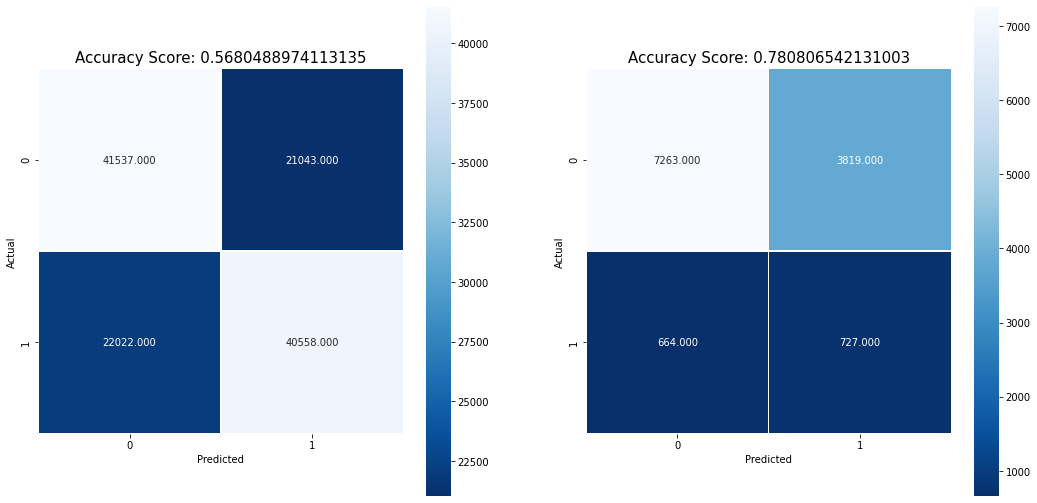

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

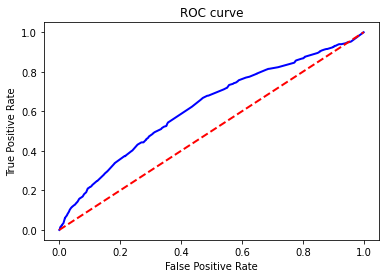

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
dt_train_auc = roc_auc_score(Y_train,Y_train_predict)
dt_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('SGD training auc is: ', dt_train_auc)
print('SGD valication training auc is: ', dt_val_auc)

SGD training auc is:  0.7254820915198504
SGD valication training auc is:  0.6202935155239725


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prob1_ = random_forest.predict_proba(X_train)
prob2_ = random_forest.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_rf, tpr_rf, _ = roc_curve(Y_val, Y_val_predict)

[[62580     0]
 [    0 62580]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62580
           1       1.00      1.00      1.00     62580

    accuracy                           1.00    125160
   macro avg       1.00      1.00      1.00    125160
weighted avg       1.00      1.00      1.00    125160

[[11051    31]
 [ 1371    20]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11082
           1       0.39      0.01      0.03      1391

    accuracy                           0.89     12473
   macro avg       0.64      0.51      0.48     12473
weighted avg       0.83      0.89      0.84     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

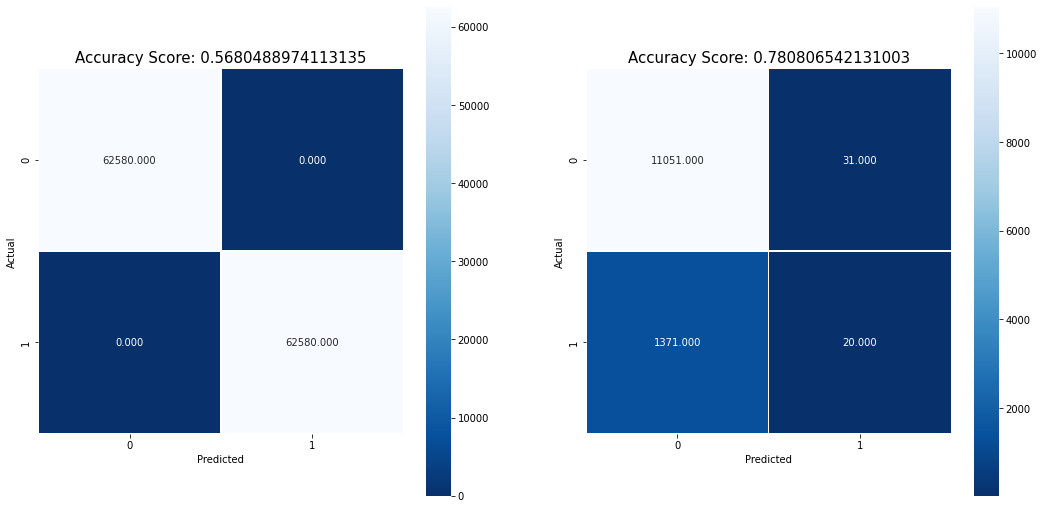

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

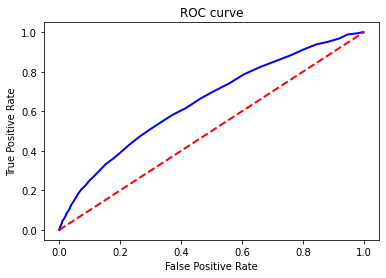

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
rf_train_auc = roc_auc_score(Y_train,Y_train_predict)
rf_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('Random Forest training auc is: ', rf_train_auc)
print('Random Forest valication training auc is: ', rf_val_auc)

Random Forest training auc is:  1.0
Random Forest valication training auc is:  0.6484218162729414


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state = 0)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
prob1_ = gbc.predict_proba(X_train)
prob2_ = gbc.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_gbc, tpr_gbc, _ = roc_curve(Y_val, Y_val_predict)

[[42537 20043]
 [20037 42543]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     62580
           1       0.68      0.68      0.68     62580

    accuracy                           0.68    125160
   macro avg       0.68      0.68      0.68    125160
weighted avg       0.68      0.68      0.68    125160

[[7381 3701]
 [ 656  735]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     11082
           1       0.17      0.53      0.25      1391

    accuracy                           0.65     12473
   macro avg       0.54      0.60      0.51     12473
weighted avg       0.83      0.65      0.71     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

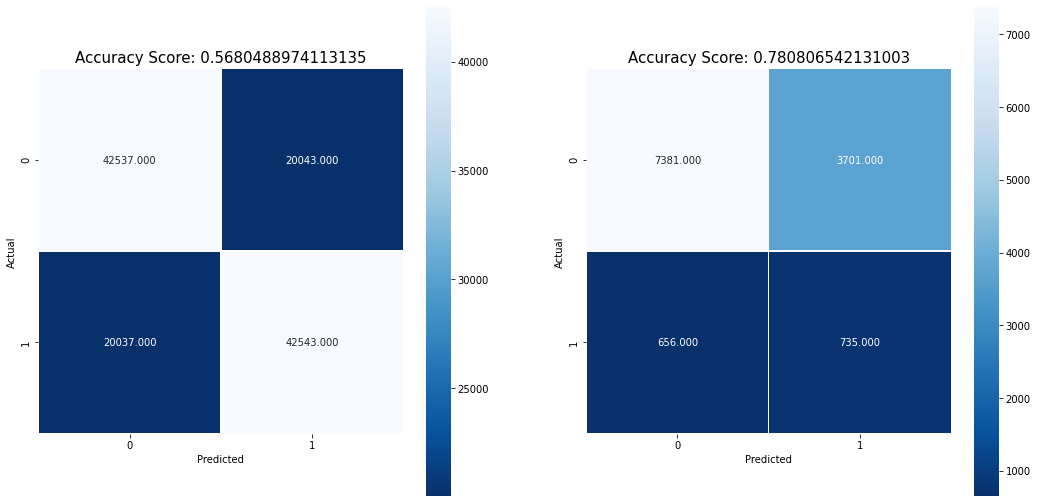

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

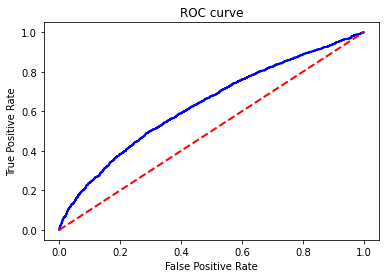

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_gbc, tpr_gbc, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
gbc_train_auc = roc_auc_score(Y_train,Y_train_predict)
gbc_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('Random Forest training auc is: ', gbc_train_auc)
print('Random Forest valication training auc is: ', gbc_val_auc)

Random Forest training auc is:  0.7505319358048161
Random Forest valication training auc is:  0.6325433527286495


## AdaBoosted Classification model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.2, random_state = 0)
adaclass.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=100, random_state=0)

In [ ]:
prob1_ = adaclass.predict_proba(X_train)
prob2_ = adaclass.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_abc, tpr_abc, _ = roc_curve(Y_val, Y_val_predict)

[[42057 20523]
 [27898 34682]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63     62580
           1       0.63      0.55      0.59     62580

    accuracy                           0.61    125160
   macro avg       0.61      0.61      0.61    125160
weighted avg       0.61      0.61      0.61    125160

[[7486 3596]
 [ 630  761]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     11082
           1       0.17      0.55      0.26      1391

    accuracy                           0.66     12473
   macro avg       0.55      0.61      0.52     12473
weighted avg       0.84      0.66      0.72     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

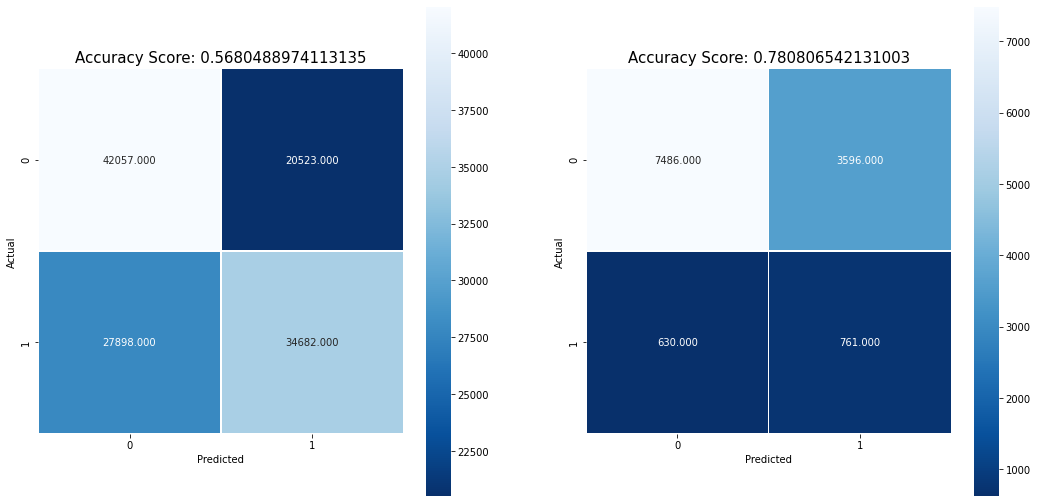

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

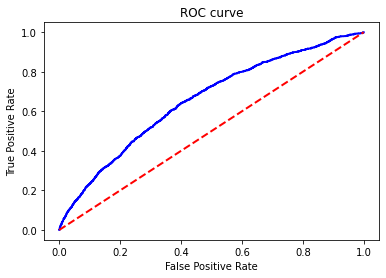

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_abc, tpr_abc, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
abc_train_auc = roc_auc_score(Y_train,Y_train_predict)
abc_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('Random Forest training auc is: ', abc_train_auc)
print('Random Forest valication training auc is: ', abc_val_auc)

Random Forest training auc is:  0.6580923987765459
Random Forest valication training auc is:  0.6562790341031388


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
prob1_ = nn.predict_proba(X_train)
prob2_ = nn.predict_proba(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

Y_train_predict = prob1_[:,1]
Y_val_predict = prob2_[:,1]

print(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)))
print(classification_report(Y_train, np.argmax(prob1_, axis=1)))
print(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)))
print(classification_report(Y_val, np.argmax(prob2_, axis=1)))
fpr_nn, tpr_nn, _ = roc_curve(Y_val, Y_val_predict)

[[39398 23182]
 [23187 39393]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     62580
           1       0.63      0.63      0.63     62580

    accuracy                           0.63    125160
   macro avg       0.63      0.63      0.63    125160
weighted avg       0.63      0.63      0.63    125160

[[7023 4059]
 [ 550  841]]
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     11082
           1       0.17      0.60      0.27      1391

    accuracy                           0.63     12473
   macro avg       0.55      0.62      0.51     12473
weighted avg       0.84      0.63      0.70     12473



Text(0.5, 1.0, 'Accuracy Score: 0.780806542131003')

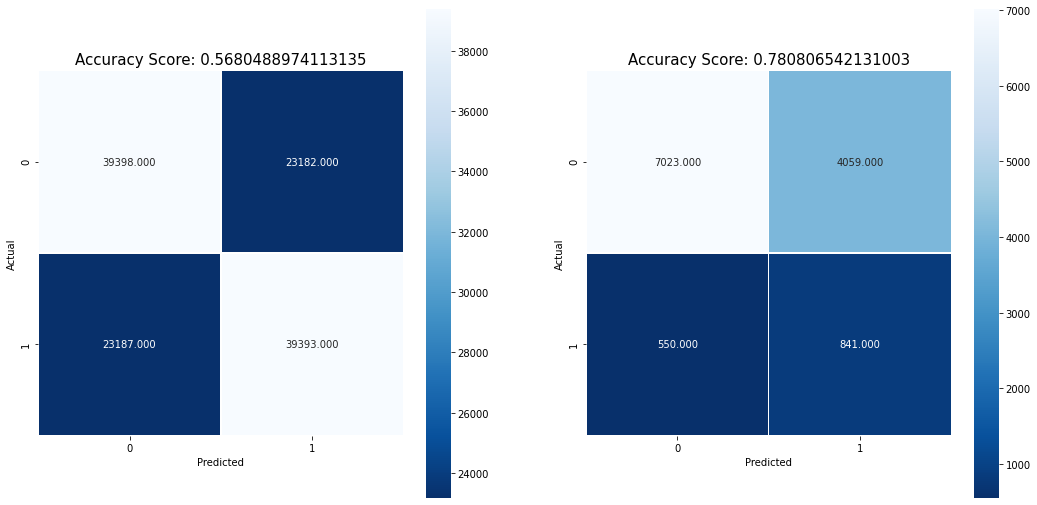

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(18,9), ncols=2, nrows=1)
sns.heatmap(confusion_matrix(Y_train, np.argmax(prob1_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[0]);
sns.heatmap(confusion_matrix(Y_val, np.argmax(prob2_, axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax[1]);
ax[0].set_xlabel('Predicted');
ax[1].set_xlabel('Predicted');
ax[0].set_ylabel('Actual');
ax[1].set_ylabel('Actual');
ax[0].set_title('Accuracy Score: {0}'.format(nb.score(X_train, Y_train)), size=15)
ax[1].set_title('Accuracy Score: {0}'.format(nb.score(X_val, Y_val)), size=15)

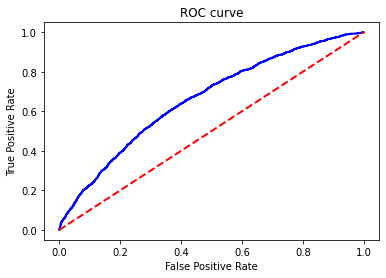

In [ ]:
# ROC
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue',lw=2, label='ROC curve') # ROC curve
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score 
nn_train_auc = roc_auc_score(Y_train,Y_train_predict)
nn_val_auc = roc_auc_score(Y_val,Y_val_predict)
print('Neural Network training auc is: ', nn_train_auc)
print('Neural Network valication training auc is: ', nn_val_auc)

Neural Network training auc is:  0.6828447335572819
Neural Network valication training auc is:  0.6610929621950272


# Feature importance

## Random forest

Top 10 features are: 
num_lab_procedures
num_medications
time_in_hospital
number_inpatient
age
num_procedures
number_diagnoses
insulin
number_outpatient
gender


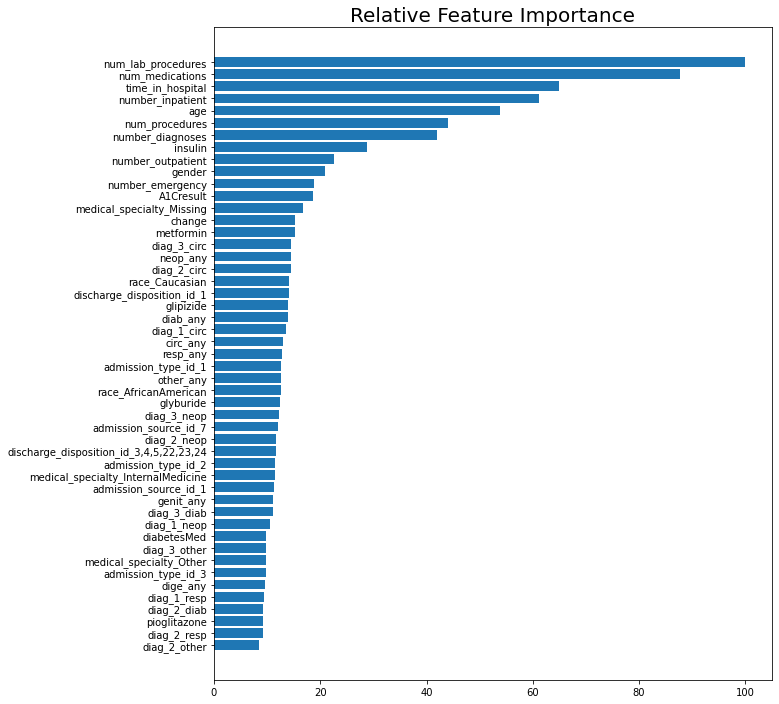

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
importances = random_forest.feature_importances_

feature_importance = 100.0 * (importances / importances.max()) # relative importance
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot top 50 features
plt.figure(figsize=(10, 12))
plt.barh(pos[39:], feature_importance[sorted_idx[39:]], align='center')
plt.yticks(pos[39:], feature_names_sort[39:])
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

# Compare the models

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

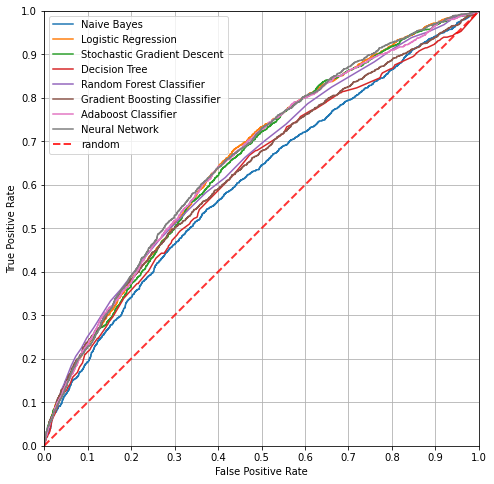

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_sgdc, tpr_sgdc, label='Stochastic Gradient Descent')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier')
plt.plot(fpr_abc, tpr_abc, label='Adaboost Classifier')
plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Conclusion

# Hyperparameter tuning

## Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_validate

# base model
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train, Y_train)
Y_val_predict = rf.predict_proba(X_val)[:,1]

# tuned model
param_grid ={
        'n_estimators': [20, 100, 200, 500], # number of trees
        'max_features': ['auto','sqrt'],
        'max_depth': range(1,10,1), # max depth of the tree
        'min_samples_split': range(2,10,2), # min number of samples to split a node
        'criterion': ['gini', 'entropy'],
},
rf_grid = GridSearchCV(rf, n_jobs=3, param_grid=param_grid) # cv: number of cross-validation splits
rf_grid.fit(X_train, Y_train)
Y_val_predict_grid = rf_grid.predict_proba(X_val)[:,1]

print(rf_grid.best_params_) # print best parameters

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}


## AdaBoosted Classification model


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_validate

ada = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
param_grid ={
        'n_estimators': [100,200,500],
        'learning_rate': [0.2,0.5,1.0],
},
grid_ada = GridSearchCV(ada, cv=3, n_jobs=3, param_grid=param_grid)
grid_ada.fit(X_train, Y_train)

print(grid_ada.best_params_)

prob1_ = grid_ada.predict_proba(X_train)
prob2_ = grid_ada.predict_proba(X_val)

Y_train_predict_grid = prob1_[:,1]
Y_val_predict_grid = prob2_[:,1]

f1_pos = f1_score(Y_train, (Y_train_predict_grid > 0.5))
f1_neg = f1_score([0 if x == 1 else 1 for x in Y_train], [0 if x == 1 else 1 for x in (Y_train_predict_grid > 0.5)])
harmonic_f1_abc_train_grid = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print("Abc Harmonic_f1 after tuning (training): ", harmonic_f1_abc_train_grid)
print("Abc Harmonic_f1 before tuning (training): ", harmonic_f1_abc_train)

f1_pos = f1_score(Y_val, (Y_val_predict_grid > 0.5))
f1_neg = f1_score([0 if x == 1 else 1 for x in Y_val], [0 if x == 1 else 1 for x in (Y_val_predict_grid > 0.5)])
harmonic_f1_abc_val_grid = ((2 * f1_pos * f1_neg) / (f1_neg + f1_pos))
print("Abc Harmonic_f1 after tuning (validation): ", harmonic_f1_abc_val_grid)
print("Abc Harmonic_f1 before tuning (validation): ", harmonic_f1_abc_val)

KeyboardInterrupt: ignored

## Gradient Boosting

In [ ]:
#Tuning 
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

gbc_random.fit(X_train, Y_train)

gbc_random.best_params_


{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

In [ ]:
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_val)[:,1]
gbc_train_auc = roc_auc_score(Y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(Y_val, y_valid_preds_random)
print('AUC_Training:%.2f'%gbc_train_auc)
print('AUC_Validation:%.2f'%gbc_valid_auc)

AUC_Training:0.73

AUC_Validation:0.67

# ROC for tuned RF, BGC, CB and NN

In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier

# GBC
gbc_model = pickle.load(open("/content/drive/My drive/gbc_classifier.pkl", "rb"))
Y_test_predict =gbc_model.predict_proba(X_test)[:,1]
fpr_gbc, tpr_gbc, _ = roc_curve(Y_test, Y_test_predict)

FileNotFoundError: ignored

In [ ]:
pwd

'/content'

In [ ]:
# random forest
openfile = open("rf_grid.pkl", "rb")
rf_model = pickle.load(openfile)
Y_test_predict =rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_test_predict)

# Catboosting
openfile = open("cb.pkl", "rb")
cb_model = pickle.load(openfile)
Y_test_predict = cb_model.predict_proba(X_test)[:,1]
fpr_cb, tpr_cb, _ = roc_curve(Y_test, Y_test_predict)

# Neural Network
openfile = open("nn.pkl", "rb")
nn_model = pickle.load(openfile)
Y_test_predict =nn_model.predict_proba(X_test)[:,1]
fpr_nn, tpr_nn, _ = roc_curve(Y_test, Y_test_predict)

FileNotFoundError: ignored